## Linear Regressions with StatsModels

Statsmodels is a great library we can use to run regressions.

### Imports

In [66]:
# Provides numerous math functions related to linear algebra and more
import numpy as np
# Provides numerous tools for manipulating tabular data and more
import pandas as pd
# Used to create static and interactive graphical data plots
import matplotlib.pyplot as plt
%matplotlib inline
# Provides numerous tools related to statistical data analysis
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns

### Exploring Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           4.25e-05
Time:                        13:50:10   Log-Likelihood:                -538.11
No. Observations:                 463   AIC:                             1080.
Df Residuals:                     461   BIC:                             1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0743      0.262     -4.094      0.000      -1.590      -0.559
eval           0.2687      0.065      4.133      0.000       0.141       0.396
==============================================================================
Omnibus:                       25.836   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.678
Skew:                           0.512   Prob(JB):                     4.38e-06
Kurtosis:                       2.518   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

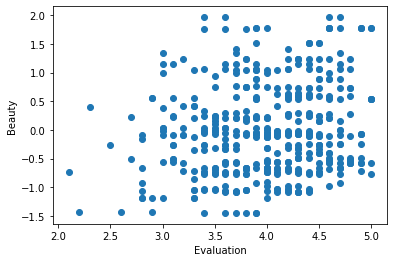

In [63]:
# You can use R datasets
# Load beauty data and a list of the required dataname data
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
beauty = sm.datasets.get_rdataset("TeachingRatings", "AER")

# Get overview of the Dataframe
# print(beauty.__doc__)

# Teacher evaluation data along with data on the professors 
# minority status, age, gender, credits, beauty rating, and
# other data
beauty.data.head()

# Get count, mean, standard deviation, min, max and averages 
# for different percentiles
beauty.data.describe()

# Create a scatter plot which predicts whether the perceived
# beauty of the instructor has anything to do with teacher
# evaluations

# 1st 5 rows of data
beauty.data.head()

y = beauty.data['beauty']
x1 = beauty.data['eval']
plt.scatter(x1, y)
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

# Define the intercept to the y line
x = sm.add_constant(x1)

# OLS Ordinary Least Squares : Estimates the data so a line can 
# be drawn through data points
results = sm.OLS(y,x).fit()
results.summary()

### Explain the Statistics

Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.

Method : Least Squares : Fit data to the model by minimizing the residual samples

R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated. 

Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.

F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means. 

Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.

Log-Likelihood : The conditional probability that the observed data fits the model

AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.

Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.

BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.

Df Model : Number of parameters in the model

Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.

Independent Coefficient : Represents the change of the independent variable per unit.

Standard Error : Accuracy of the coefficients

P>|t| : The P Value. A P Value less than .05 is considered statistically significant.

[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.

Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.

Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated. 

Prob(Omnibus) : Probability of Omnibus

Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution. 

Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.

Prob(JB) : The probability of Jarque-Bera

Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.

Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.

### Plot Regression Line

Text(0, 0.5, 'Beauty')

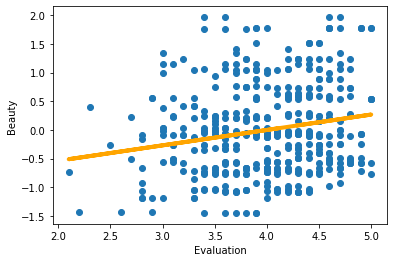

In [65]:
plt.scatter(x1, y)
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

# Create the regression line
yhat = 0.2687 * x1 - 1.0743
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression')
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

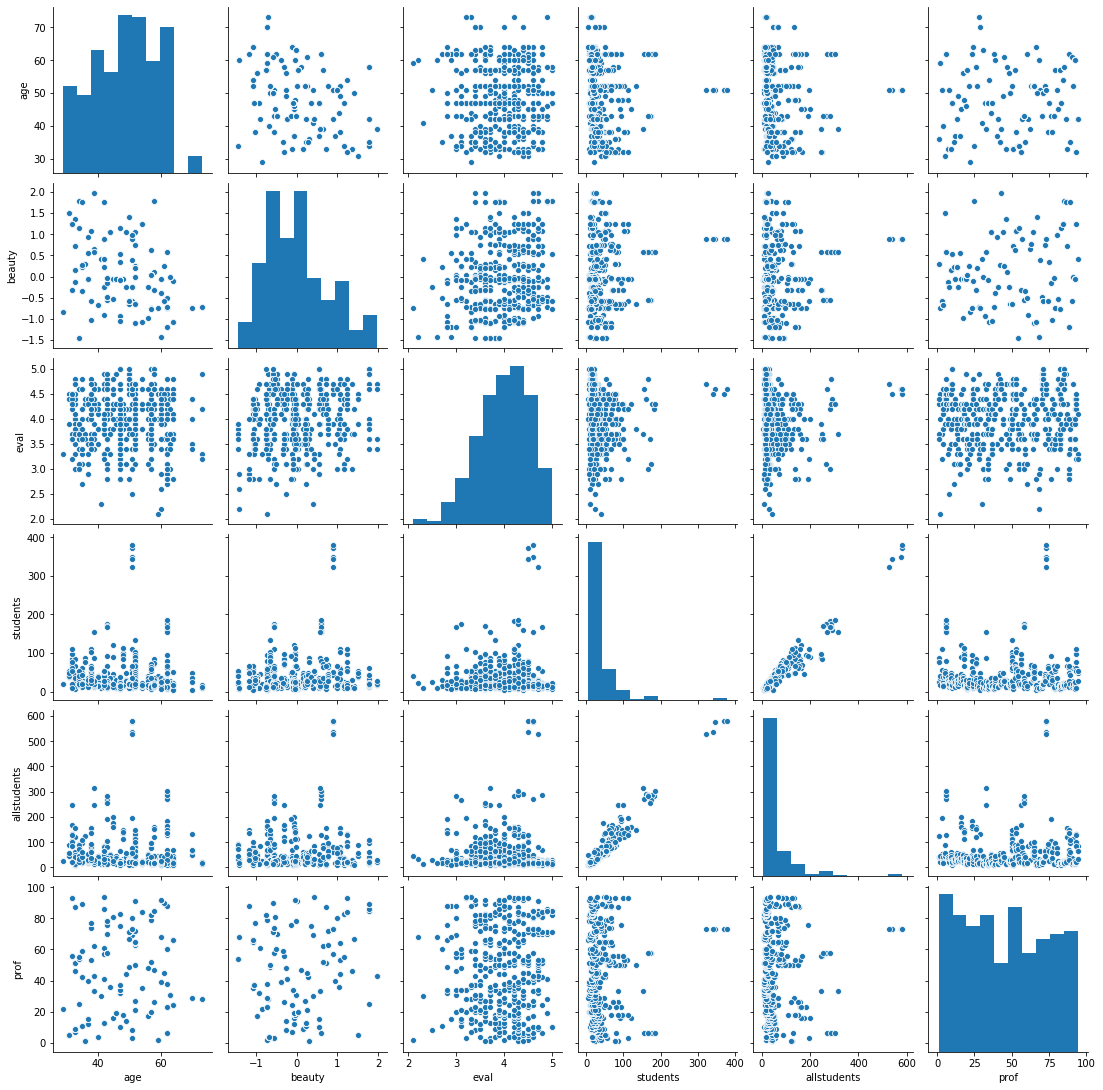

In [68]:
sns.pairplot(beauty.data)

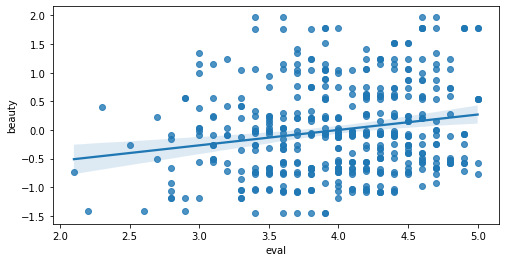

In [75]:
plt.figure(figsize=(8,4))
sns.regplot(x="eval", y="beauty", data=beauty.data)

### Analyzing Tip Amounts

In [80]:
# Load tip dataset
tips = sns.load_dataset("tips")
# Get column data in dataset
tips.columns

y = tips['total_bill']
x1 = tips['tip']

# Define the intercept to the y line
x = sm.add_constant(x1)

# OLS Ordinary Least Squares : Estimates the data so a line can 
# be drawn through data points
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           6.69e-34
Time:                        14:26:14   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tips Regression Line

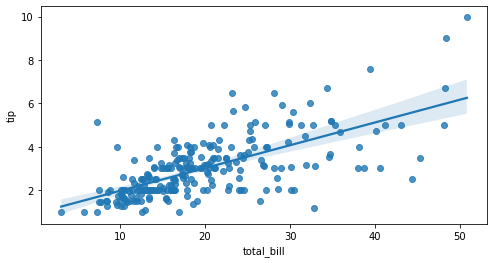

In [83]:
plt.figure(figsize=(8,4))
sns.regplot(x="total_bill", y="tip", data=tips)